# Gender Classification using NLP Techniques

In [1]:
import numpy as np # linear algebra
import pandas as pd

In [2]:
data = pd.read_csv("gender-classifier-DFE-791531.csv",encoding='latin-1')

In [3]:
data

,_unit_id,_golden,_unit_state,_trusted_judgments,_last_judgment_at,gender,gender:confidence,profile_yn,profile_yn:confidence,created,...,profileimage,retweet_count,sidebar_color,text,tweet_coord,tweet_count,tweet_created,tweet_id,tweet_location,user_timezone
0,815719226,False,finalized,3,10/26/15 23:24,male,1.0000,yes,1.0,12/5/13 1:48,...,https://pbs.twimg.com/profile_images/414342229...,0,FFFFFF,Robbie E Responds To Critics After Win Against...,NaN,110964,10/26/15 12:40,6.587300e+17,main; @Kan1shk3,Chennai
1,815719227,False,finalized,3,10/26/15 23:30,male,1.0000,yes,1.0,10/1/12 13:51,...,https://pbs.twimg.com/profile_images/539604221...,0,C0DEED,ÛÏIt felt like they were my friends and I was...,NaN,7471,10/26/15 12:40,6.587300e+17,NaN,Eastern Time (US & Canada)
2,815719228,False,finalized,3,10/26/15 23:33,male,0.6625,yes,1.0,11/28/14 11:30,...,https://pbs.twimg.com/profile_images/657330418...,1,C0DEED,i absolutely adore when louis starts the songs...,NaN,5617,10/26/15 12:40,6.587300e+17,clcncl,Belgrade
3,815719229,False,finalized,3,10/26/15 23:10,male,1.0000,yes,1.0,6/11/09 22:39,...,https://pbs.twimg.com/profile_images/259703936...,0,C0DEED,Hi @JordanSpieth - Looking at the url - do you...,NaN,1693,10/26/15 12:40,6.587300e+17,"Palo Alto, CA",Pacific Time (US & Canada)
4,815719230,False,finalized,3,10/27/15 1:15,female,1.0000,yes,1.0,4/16/14 13:23,...,https://pbs.twimg.com/profile_images/564094871...,0,0,Watching Neighbours on Sky+ catching up with t...,NaN,31462,10/26/15 12:40,6.587300e+17,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20045,815757572,True,golden,259,NaN,female,1.0000,yes,1.0,8/5/15 21:16,...,https://pbs.twimg.com/profile_images/656793310...,0,C0DEED,"@lookupondeath ...Fine, and I'll drink tea too...",NaN,783,10/26/15 13:20,6.587400e+17,Verona ªÁ,NaN
20046,815757681,True,golden,248,NaN,male,1.0000,yes,1.0,8/15/12 21:17,...,https://pbs.twimg.com/profile_images/639815429...,0,0,Greg Hardy you a good player and all but don't...,NaN,13523,10/26/15 12:40,6.587300e+17,"Kansas City, MO",NaN
20047,815757830,True,golden,264,NaN,male,1.0000,yes,1.0,9/3/12 1:17,...,https://pbs.twimg.com/profile_images/655473271...,0,C0DEED,You can miss people and still never want to se...,NaN,26419,10/26/15 13:20,6.587400e+17,Lagos Nigeria,NaN
20048,815757921,True,golden,250,NaN,female,0.8489,yes,1.0,11/6/12 23:46,...,https://pbs.twimg.com/profile_images/657716093...,0,0,@bitemyapp i had noticed your tendency to pee ...,NaN,56073,10/26/15 12:40,6.587300e+17,Texas Hill Country,NaN


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20050 entries, 0 to 20049
Data columns (total 26 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   _unit_id               20050 non-null  int64  
 1   _golden                20050 non-null  bool   
 2   _unit_state            20050 non-null  object 
 3   _trusted_judgments     20050 non-null  int64  
 4   _last_judgment_at      20000 non-null  object 
 5   gender                 19953 non-null  object 
 6   gender:confidence      20024 non-null  float64
 7   profile_yn             20050 non-null  object 
 8   profile_yn:confidence  20050 non-null  float64
 9   created                20050 non-null  object 
 10  description            16306 non-null  object 
 11  fav_number             20050 non-null  int64  
 12  gender_gold            50 non-null     object 
 13  link_color             20050 non-null  object 
 14  name                   20050 non-null  object 
 15  pr

In [5]:
data = pd.concat([data.gender,data.description],axis=1)

In [6]:
data.head()

,gender,description
0,male,i sing my own rhythm.
1,male,I'm the author of novels filled with family dr...
2,male,louis whining and squealing and all
3,male,"Mobile guy. 49ers, Shazam, Google, Kleiner Pe..."
4,female,Ricky Wilson The Best FRONTMAN/Kaiser Chiefs T...


DATA CLEANING

In [7]:
data.dropna(axis = 0, inplace = True)

In [8]:
data.gender = [1 if each == "female" else 0 for each in data.gender]

In [9]:
data.gender.unique()

array([0, 1], dtype=int64)

In [10]:
import re
first_description = data.description[4]
first_description

'Ricky Wilson The Best FRONTMAN/Kaiser Chiefs The Best BAND Xxxx Thank you Kaiser Chiefs for an incredible year of gigs and memories to cherish always :) Xxxxxxx'

In [11]:
description = re.sub("[^a-zA-Z]"," ",first_description)
description

'Ricky Wilson The Best FRONTMAN Kaiser Chiefs The Best BAND Xxxx Thank you Kaiser Chiefs for an incredible year of gigs and memories to cherish always    Xxxxxxx'

In [12]:
description = description.lower()
description

'ricky wilson the best frontman kaiser chiefs the best band xxxx thank you kaiser chiefs for an incredible year of gigs and memories to cherish always    xxxxxxx'

In [13]:
import nltk # natural language tool kit
nltk.download("stopwords")
from nltk.corpus import stopwords
import nltk
nltk.download('punkt')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [14]:
description = nltk.word_tokenize(description)

In [15]:
description = [ word for word in description if not word in set(stopwords.words("english"))]

In [16]:
description

['ricky',
 'wilson',
 'best',
 'frontman',
 'kaiser',
 'chiefs',
 'best',
 'band',
 'xxxx',
 'thank',
 'kaiser',
 'chiefs',
 'incredible',
 'year',
 'gigs',
 'memories',
 'cherish',
 'always',
 'xxxxxxx']

In [17]:
import nltk as nlp
lemma = nlp.WordNetLemmatizer()
description = [ lemma.lemmatize(word) for word in description ]
print(description)

['ricky', 'wilson', 'best', 'frontman', 'kaiser', 'chief', 'best', 'band', 'xxxx', 'thank', 'kaiser', 'chief', 'incredible', 'year', 'gig', 'memory', 'cherish', 'always', 'xxxxxxx']


In [18]:
description = " ".join(description)
print(description)

ricky wilson best frontman kaiser chief best band xxxx thank kaiser chief incredible year gig memory cherish always xxxxxxx


In [19]:
description_list = []
for description in data.description:
    description = re.sub("[^a-zA-Z]"," ",description)
    description = description.lower()
    description = nltk.word_tokenize(description)
    description = [ word for word in description if not word in set(stopwords.words("english"))]
    lemma = nlp.WordNetLemmatizer()
    description = [ lemma.lemmatize(word) for word in description ]
    description = " ".join(description)
    description_list.append(description)

In [20]:
from sklearn.feature_extraction.text import CountVectorizer
max_features = 500
count_vectorizer = CountVectorizer(max_features=max_features,stop_words="english",)
sparce_matrix = count_vectorizer.fit_transform(description_list).toarray()
print("Most common {} words : {}".format(max_features,count_vectorizer.get_feature_names()))

Most common 500 words : ['account', 'activist', 'actor', 'addict', 'adult', 'adventure', 'advocate', 'alum', 'amazing', 'america', 'american', 'angel', 'animal', 'anime', 'app', 'area', 'art', 'artist', 'ask', 'aspiring', 'author', 'award', 'away', 'awesome', 'baby', 'bad', 'band', 'based', 'beautiful', 'beauty', 'beer', 'believe', 'best', 'better', 'big', 'bio', 'bit', 'bitch', 'black', 'blog', 'blogger', 'blue', 'book', 'booking', 'born', 'bot', 'boy', 'brand', 'breaking', 'building', 'business', 'ca', 'car', 'care', 'cat', 'cause', 'ceo', 'certified', 'change', 'channel', 'check', 'chicago', 'chief', 'child', 'christ', 'christian', 'city', 'class', 'club', 'coach', 'coffee', 'college', 'com', 'come', 'comic', 'coming', 'communication', 'community', 'company', 'computer', 'conservative', 'consultant', 'contact', 'content', 'continuous', 'cool', 'country', 'county', 'crazy', 'create', 'creative', 'creator', 'culture', 'currently', 'dad', 'daily', 'dance', 'data', 'day', 'deal', 'dedic

Perform EDA to understand data better

In [21]:
y = data.gender.values # male ofr female classes
x = sparce_matrix

In [22]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.1, random_state = 42)

In [23]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(x_train,y_train)

GaussianNB()

In [24]:
y_pred = nb.predict(x_test)

print("accuracy: ",nb.score(y_pred.reshape(-1,1),y_test))

accuracy:  0.414664202094886


DATA VISUALIZATION

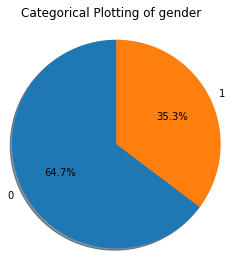

In [25]:
from matplotlib import pyplot
pd.value_counts(data['gender']).plot(kind="pie", startangle = 90, shadow = True, radius = 1.2, autopct = '%1.1f%%')
pyplot.suptitle('Categorical Plotting of gender')
pyplot.xlabel("")
pyplot.ylabel("")
pyplot.show()

In [26]:
data

,gender,description
0,0,i sing my own rhythm.
1,0,I'm the author of novels filled with family dr...
2,0,louis whining and squealing and all
3,0,"Mobile guy. 49ers, Shazam, Google, Kleiner Pe..."
4,1,Ricky Wilson The Best FRONTMAN/Kaiser Chiefs T...
...,...,...
20045,1,(rp)
20046,0,"Whatever you like, it's not a problem at all. ..."
20047,0,#TeamBarcelona ..You look lost so you should f...
20048,1,Anti-statist; I homeschool my kids. Aspiring t...


In [27]:
from sklearn import preprocessing
from sklearn.feature_extraction.text import TfidfVectorizer
Vectorize = TfidfVectorizer(stop_words='english', token_pattern=r'\w{1,}', max_features=35000)
X = Vectorize.fit_transform(data["description"])
y = data.gender 
le = preprocessing.LabelEncoder()
y = le.fit_transform(y.values)

In [28]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn import tree
models = []
models.append(("k Nearest Neighbor",KNeighborsClassifier(n_neighbors=5)))
models.append(("Random Forest",RandomForestClassifier(n_estimators=100, max_depth=2)))
models.append(("Logistic Regression",LogisticRegression()))
models.append(("Naive Bayes",MultinomialNB()))
models.append(("Decision Tree",tree.DecisionTreeClassifier()))

In [29]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import make_scorer
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_validate
def cross_validate_evaluate(algorithm):
    
    # Build model
    clf = algorithm
    # Not Need
    def tn(y_true, y_pred): return confusion_matrix(y_true, y_pred)[0, 0]
    def fp(y_true, y_pred): return confusion_matrix(y_true, y_pred)[0, 1]
    def fn(y_true, y_pred): return confusion_matrix(y_true, y_pred)[1, 0]
    def tp(y_true, y_pred): return confusion_matrix(y_true, y_pred)[1, 1]
    scoring = {'tp': make_scorer(tp), 'tn': make_scorer(tn),
               'fp': make_scorer(fp), 'fn': make_scorer(fn)}
    
    # Stratified k-Fold 
    skf = StratifiedKFold(n_splits=10, shuffle=True)
    # Evaluation Indicator
    score_funcs = [
        'accuracy',
        'precision',
        'recall',
        'f1',
    ]
    # Cross Validation 
    scores = cross_validate(clf, X, y, cv=skf, scoring=score_funcs)
    print('accuracy:', scores['test_accuracy'].mean())
    print('precision:', scores['test_precision'].mean())
    print('recall:', scores['test_recall'].mean())
    print('f1:', scores['test_f1'].mean())
    
    #return scores

#if __name__ == '__main__':
#    main()
models_index=0
name_index=1
for models_index in range(len(models)):
    print("-----------"+str(models[models_index][name_index-1])+"-----------")
    cross_validate_evaluate(models[models_index][name_index])

-----------k Nearest Neighbor-----------
accuracy: 0.5176907479033286
precision: 0.3808348019312157
recall: 0.5867376951146585
f1: 0.4609717512684872
-----------Random Forest-----------


C:\Users\HP\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\HP\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\HP\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\HP\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defin

accuracy: 0.6471277558341748
precision: 0.0
recall: 0.0
f1: 0.0
-----------Logistic Regression-----------
accuracy: 0.715976563776113
precision: 0.6837586203684127
recall: 0.36331935952354805
f1: 0.4744020727109176
-----------Naive Bayes-----------
accuracy: 0.693109797280614
precision: 0.6865967996201482
recall: 0.2394790636937234
f1: 0.35483251212860084
-----------Decision Tree-----------
accuracy: 0.670611766886761
precision: 0.5311989939363925
recall: 0.585324448675234
f1: 0.556382695651852


In [30]:
def rmse_cv(model):
    rmse= np.sqrt(-cross_val_score(model, x_train, y_train, scoring="neg_mean_squared_error", cv = 5))
    return(rmse)

In [31]:
from sklearn.linear_model import Ridge, RidgeCV, ElasticNet, LassoCV, LassoLarsCV
from sklearn.model_selection import cross_val_score
model_lasso = LassoCV(alphas = [1, 0.1, 0.001, 0.0005]).fit(x_train, y_train)
rmse_cv(model_lasso).mean()

0.451187598755026

In [32]:
index_list = []
for i in range(len(model_lasso.coef_)):
    index_list.append(i)
coef_dict = dict(zip(index_list,model_lasso.coef_))
tfidf_name = Vectorize.get_feature_names()
for i in range(len(coef_dict)):
    if coef_dict.get(i) > abs(0):
        print(tfidf_name[i] + " : " + str(coef_dict[i]))
        Vectorize.get_feature_names()

0040 : 0.03642584162737459
01036 : 0.05747726996621742
01701 : 0.011423416127693877
01743 : 0.05016446608383208
01756 : 0.0034899151979447527
01851 : 0.09632391932220581
01864 : 0.04925472224840821
02111 : 0.09183311178987127
03 : 0.0035763196642390857
0417 : 0.024198867634574475
0ilh1tsnzu : 0.0011759397712871559
1000cadeaus : 0.011331846780595902
1010xl : 0.2735444797076205
1020chrisworld : 0.11899435732057026
10am : 0.022459613645565535
10p : 0.29692882149731353
10x : 0.05057759940248404
115 : 0.048237902510351593
11alivenews : 0.06099211459445801
12969 : 0.06772153440854009
12k : 0.012032994932167371
132 : 0.04291016322779199
1326 : 0.03939939954392353
140212 : 0.07143397585566509
150315 : 0.04208529380748337
150516 : 0.017748520561795454
150518 : 0.03523568174614602
150816 : 0.003453198833211677
15pm : 0.01041720449136024
15yrs : 0.06302007565169056
16 : 0.10213933048791117
16850 : 0.0061457029012788895
17x : 0.012736235638126038
17yo : 0.06459342999433881
18 : 0.2651040788088076


In [33]:
print(model_lasso.intercept_)

0.39287830183040334


Build a neural network using Sklearn 

In [34]:
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import Perceptron
from sklearn.metrics import accuracy_score

per = Perceptron(random_state = 42,max_iter = 20,tol = 0.01)
per.fit(x_train,y_train)

yhat_train_per = per.predict(x_train)
yhat_test_per = per.predict(x_test)

print(f"Perceptron:Accuracy in train is  0.2%f"%(accuracy_score(y_train,yhat_train_per)))
print(f"Perceptron:Accuracy in test is  0.2%f"%(accuracy_score(y_test,yhat_test_per)))

mlp = MLPClassifier(max_iter = 50,solver = 'sgd',verbose = 10,random_state = 42,learning_rate_init = 0.01,hidden_layer_sizes = (100,100,2))
mlp.fit(x_train,y_train)

yhat_train_mlp = mlp.predict(x_train)
yhat_test_mlp = mlp.predict(x_test)

print(f"Multilayer Perceptron:Accuracy in train is  0.2%f"%(accuracy_score(y_train,yhat_train_mlp)))
print(f"Multilayer Perceptron:Accuracy in test is  0.2%f"%(accuracy_score(y_test,yhat_test_mlp)))
                

Perceptron:Accuracy in train is  0.20.660571
Perceptron:Accuracy in test is  0.20.636476
Iteration 1, loss = 0.69112659
Iteration 2, loss = 0.64562488
Iteration 3, loss = 0.64258892
Iteration 4, loss = 0.63907023
Iteration 5, loss = 0.63300995
Iteration 6, loss = 0.62393118
Iteration 7, loss = 0.61307261
Iteration 8, loss = 0.59998810
Iteration 9, loss = 0.58898253
Iteration 10, loss = 0.57913621
Iteration 11, loss = 0.57123982
Iteration 12, loss = 0.56386175
Iteration 13, loss = 0.56183985
Iteration 14, loss = 0.55695728
Iteration 15, loss = 0.55326186
Iteration 16, loss = 0.54652456
Iteration 17, loss = 0.54129569
Iteration 18, loss = 0.53581434
Iteration 19, loss = 0.53700906
Iteration 20, loss = 0.57564766
Iteration 21, loss = 0.55307243
Iteration 22, loss = 0.54405513
Iteration 23, loss = 0.52695000
Iteration 24, loss = 0.54313069
Iteration 25, loss = 0.52937286
Iteration 26, loss = 0.51822813
Iteration 27, loss = 0.51328223
Iteration 28, loss = 0.55526965
Iteration 29, loss = 0.5

C:\Users\HP\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


Multilayer Perceptron:Accuracy in test is  0.20.649415


In [35]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(x_train,y_train)
y_pred = nb.predict(x_test)

print("accuracy: ",nb.score(y_pred.reshape(-1,1),y_test))

accuracy:  0.414664202094886
